In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
from apyori import apriori 
from pyspark import SparkContext
from pyspark.mllib.fpm import FPGrowth
import networkx as nx
from networkx import (draw,DiGraph,Graph)
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


## Load the data from the dictionary

In [5]:
# with open("nsclc-mapping.js","r") as mappings:
#     related_dict = json.load(mappings)

In [6]:
ROOT = "/Users/bryan/Desktop/Big_data_analysis/project/"

In [7]:
with open(ROOT+"protein/json/Patient-1.json","r") as file1:#change this part
    data_patient = json.load(file1)
# useful = {}
# for keys in data_patient["data"].keys():
#    if keys in related_dict.keys():
#       useful[keys] = data_patient["data"][keys]
# df=pd.DataFrame.from_dict(list(useful.items()))
# df = pd.DataFrame.from_dict(list(data_patient["data"].items()))
# df_outer = pd.DataFrame.from_dict(list(data_patient["data"].items()))

In [8]:
upper = 1.5
lower = 0.8

# useful = {}
# for keys in data_patient["data"].keys():
#    if keys in related_dict.keys():
#       useful[keys] = data_patient["data"][keys]
# df=pd.DataFrame.from_dict(list(useful.items()))
df = pd.DataFrame.from_dict(list(data_patient["data"].items()))
df_outer = pd.DataFrame.from_dict(list(data_patient["data"].items()))

patient_number=sorted(os.listdir(ROOT+"protein/json"))[2:]
regex = "Patient-[0-9]+"
ls = ["Patient-1"]
for patients in patient_number:
    if re.match(regex,patients)!=None:
        names = patients[:-5]
        
        with open(ROOT+"protein/json/" + patients) as file:
            data_patient = json.load(file)
#             useful = {}
#             for keys in data_patient["data"].keys():
#                 if keys in related_dict.keys():
#                     useful[keys] = data_patient["data"][keys]
        dfi =pd.DataFrame.from_dict(list(data_patient["data"].items()))
        df = df.merge(dfi,left_on = 0, right_on = 0)
        ls.append(names)
            
ls.insert(0,"Protein")
df.columns=ls

In [28]:
upper = 1.5
lower = 0.8

# useful = {}
# for keys in data_patient["data"].keys():
#    if keys in related_dict.keys():
#       useful[keys] = data_patient["data"][keys]
# df=pd.DataFrame.from_dict(list(useful.items()))
df = pd.DataFrame.from_dict(list(data_patient["data"].items()))
df_outer = pd.DataFrame.from_dict(list(data_patient["data"].items()))

patient_number=sorted(os.listdir(ROOT+"protein/json"))[2:]
regex = "Patient-[0-9]+"
ls = ["Patient-1"]
for patients in patient_number:
    if re.match(regex,patients)!=None:
        names = patients[:-5]
        
        with open(ROOT+"protein/json/" + patients) as file:
            data_patient = json.load(file)
#             useful = {}
#             for keys in data_patient["data"].keys():
#                 if keys in related_dict.keys():
#                     useful[keys] = data_patient["data"][keys]
        dfi =pd.DataFrame.from_dict(list(data_patient["data"].items()))
        df = df.merge(dfi,left_on = 0, right_on = 0)
        ls.append(names)
            
ls.insert(0,"Protein")
df.columns=ls



In [15]:
a = df.iloc[:,1:].values.reshape((-1,))

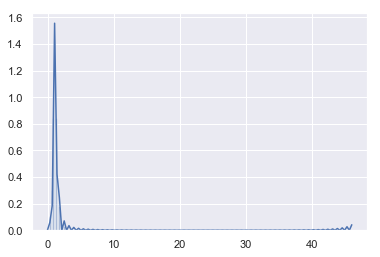

In [37]:
sns.set()
t = sns.distplot(a,200)

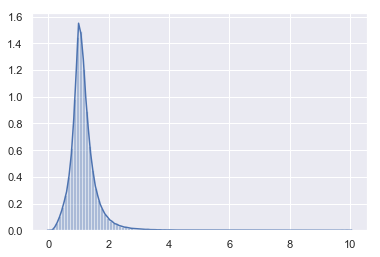

In [31]:
sns.set()
t = sns.distplot(a[a<10],100)


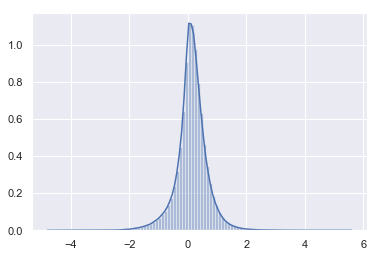

In [35]:
sns.set()
t = sns.distplot(np.log2(a),100)



In [18]:
np.max(a)

45.991

In [50]:
ex.index = ex.Entry_name.apply(lambda x: x.split("_")[0])

In [56]:
exs = ex.iloc[:,5:].transpose()
exs.head()

Entry_name,TXD12,ODPX,MTNB,MD2L2,CIAO1,FND3B,NNTM,KV310,KIF3B,WDR83,...,K1C27,CENPU,CCR9,FRPD4,CRBA1,FANCM,MZF1,CLC4C,KLH21,TTK
P002,3.541,0.985,2.073,0.964,2.244,2.089,1.124,1.780,1.224,0.944,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P004,2.417,0.802,2.599,1.374,2.226,1.957,0.816,3.903,1.391,1.045,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P005,2.075,1.299,1.742,1.000,1.712,1.897,1.215,1.642,1.451,1.178,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P006,3.837,1.437,2.406,1.000,1.724,1.346,1.144,1.596,1.465,0.915,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P007,3.254,1.139,1.627,1.000,1.308,2.298,1.124,1.318,1.122,0.868,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### set threshold

In [ ]:
upper=1.3
lower=0.9

In [57]:
high_count = exs[exs>upper].count()
low_count = exs[exs<lower].count()
high_count[high_count>40]
low_count[(low_count<10) & (high_count<10)]

Entry_name
RN122    8
ZN236    7
LST8     8
S41A2    2
BMP10    1
IQCE     4
SCN3A    4
P2R3B    0
AMPQ     0
CNTP4    1
PGBD5    0
TFE2     5
UPP2     1
DNAL4    1
STAR9    5
TIM      2
CHCH9    2
MT1X     6
ANGL3    7
CCHCR    3
IFFO2    0
SATB1    7
DRD2     8
SGSM2    0
LRP1B    6
DPYL4    3
CP39A    6
FAXC     0
KRT36    7
VWA3A    1
        ..
CFA43    0
ZN750    0
IF       0
O13C2    0
F124A    0
DKK4     0
CCNA1    0
IER2     0
HECAM    0
IBP1     0
CXL11    0
AN36B    0
F217A    0
GLYAT    0
ZN442    0
CCD26    0
PYGO1    0
GP182    0
KLF11    0
ARL16    0
K1C27    0
CENPU    0
CCR9     0
FRPD4    0
CRBA1    0
FANCM    0
MZF1     0
CLC4C    0
KLH21    0
TTK      0
Length: 2791, dtype: int64

In [6]:
len(df)

10749

In [7]:
patient_number=sorted(os.listdir(ROOT+"protein/json"))[2:]
regex = "Patient-[0-9]+"
ls = ["Patient-1"]
for patients in patient_number:
    if re.match(regex,patients)!=None:
        names = patients[:-5]
        
        with open(ROOT+"protein/json/" + patients) as file:
            data_patient = json.load(file)
#             useful = {}
#             for keys in data_patient["data"].keys():
#                 if keys in related_dict.keys():
#                     useful[keys] = data_patient["data"][keys]
        dfi =pd.DataFrame.from_dict(list(data_patient["data"].items()))
        df = df.merge(dfi,left_on = 0, right_on = 0)
        ls.append(names)
            
ls.insert(0,"Protein")
df.columns=ls

In [8]:
# df_outer.rename(columns={ df_outer.columns[0]: "protein" }, inplace=True)
patient_number=sorted(os.listdir(ROOT+"protein/json"))[2:]
regex = "Patient-[0-9]+"
ls = ["Patient-1"]
for patients in patient_number:
    if re.match(regex,patients)!=None:
        names = patients[:-5]
        
        with open(ROOT+"protein/json/" + patients) as file:
            data_patient = json.load(file)
#             useful = {}
#             for keys in data_patient["data"].keys():
#                 if keys in related_dict.keys():
#                     useful[keys] = data_patient["data"][keys]
        dfi =pd.DataFrame.from_dict(list(data_patient["data"].items()))
#         dfi.rename(columns={ dfi.columns[0]: "protein" }, inplace=True)
        df_outer = df_outer.merge(dfi,left_on = 0 ,right_on = 0, how='outer')
        ls.append(names)
            
ls.insert(0,"Protein")
df_outer.columns=ls

In [9]:
# for i in range(len(df["Protein"])):
#     df["Protein"][i] = related_dict[df["Protein"][i]]

In [58]:
df

,Protein,Patient-1,Patient-10,Patient-11,Patient-12,Patient-13,Patient-14,Patient-15,Patient-16,Patient-17,...,Patient-88,Patient-89,Patient-9,Patient-90,Patient-91,Patient-92,Patient-93,Patient-94,Patient-95,Patient-96
0,O95881,2.741,1.864,1.714,2.527,1.234,2.070,1.439,1.119,1.468,...,1.786,1.002,1.730,1.579,1.243,2.313,1.137,0.987,1.543,1.611
1,O00330,1.084,1.208,1.095,1.225,1.038,0.923,1.022,1.592,1.026,...,0.933,1.021,1.046,0.921,1.217,1.442,0.951,0.955,1.210,0.957
2,Q96GX9,1.558,1.366,0.965,1.580,1.562,1.342,1.370,1.702,1.452,...,1.257,1.670,1.536,2.557,1.177,1.297,1.439,1.249,1.357,1.476
3,O76071,1.855,1.489,1.014,1.424,1.438,1.596,1.386,1.380,1.561,...,1.752,1.254,1.477,1.962,1.038,1.677,1.707,1.296,1.721,1.644
4,Q53EP0,1.806,1.547,1.566,1.618,1.195,1.182,1.120,1.167,1.768,...,1.631,1.100,1.566,1.138,1.745,1.396,1.529,1.487,1.318,1.842
5,Q13423,1.064,1.127,1.170,1.197,1.149,1.189,1.090,2.033,1.075,...,1.042,1.063,1.268,0.936,1.252,0.931,0.870,0.884,1.173,0.867
6,O15066,1.633,1.234,0.862,1.400,1.309,1.443,1.141,1.536,1.208,...,1.513,1.180,1.331,1.818,1.043,1.253,1.250,1.182,1.366,1.684
7,Q9BRX9,1.235,1.281,0.990,1.387,0.967,1.224,0.951,1.092,0.998,...,1.102,1.071,1.224,0.738,1.086,1.173,1.201,0.959,1.152,1.293
8,P62875,1.059,1.108,0.984,1.062,1.323,0.961,1.161,1.133,0.994,...,1.124,0.927,1.079,1.104,1.020,1.177,0.874,1.126,1.181,1.088
9,P29728,1.666,1.326,1.020,3.314,1.122,1.047,0.988,1.488,1.376,...,1.464,0.964,1.232,1.091,1.685,1.169,0.926,1.088,2.252,0.859


## Filter the protein content ratio with upper bond and lower bond

In [32]:

patient = df.iloc[:,1:]
patient[patient>upper]=5
patient[patient<lower]=-5
#patient[(patient >= lower)[patient <= upper]==True]=0 #Comment out this line when we don't need to take the normal index into consideration

patient.insert(0,"Protein",df.iloc[:,0])
patient = patient.transpose()
# patient.replace(5,'Up', inplace=True)
# patient.replace(-5,'Low', inplace=True)
#patient.replace(0,'Normal', inplace=True)


In [38]:
upper=1.3
lower=0.9
patient = df.iloc[:,1:]
# patient.insert(0,"Protein",df.iloc[:,0])
patient = patient.transpose()
high_count = patient[patient>upper].count()
low_count = patient[patient<lower].count()
high_count[high_count>40]
low_count[(low_count<10) & (high_count<10)]

8       3
25      9
57      9
64      4
116     2
133     9
151     7
181     4
184     3
201     0
213     7
230     0
243     8
279     9
286     3
355     8
365     4
384     7
404     9
415     8
428     9
486     1
518     4
532     3
535     4
548     8
561     8
572     1
605     8
617     6
       ..
7507    9
7509    6
7548    5
7554    6
7562    1
7567    1
7605    7
7629    4
7630    4
7647    6
7653    2
7654    5
7665    1
7673    5
7688    8
7693    5
7695    7
7699    1
7701    6
7731    1
7739    6
7818    0
7854    6
7862    4
7871    6
7900    4
7917    5
7951    6
7957    7
7976    8
Length: 447, dtype: int64

In [33]:
df_t = patient
df_t.columns = df.iloc[:,0]
df_t = df_t.drop("Protein", axis =0)
df_t = df_t.astype('float64') 
corr = df_t.corr()
corr

Protein,O95881,O00330,Q96GX9,O76071,Q53EP0,Q13423,O15066,Q9BRX9,P62875,P29728,...,Q641Q2,Q14185,P04156,Q6Y7W6,P55061,Q96TA2,Q96DZ9,P32189,Q9BU40,Q07812
Protein,,,,,,,,,,,,,,,,,,,,,
O95881,1.000000,0.062680,0.331931,0.581038,0.323412,0.073837,0.375357,0.183574,0.084709,0.205264,...,0.271314,-0.349325,-0.362015,0.224244,0.076176,0.261631,-0.460191,0.418924,-0.355194,0.488334
O00330,0.062680,1.000000,0.041298,0.061889,0.021571,0.450189,0.066139,0.145454,-0.066058,0.015853,...,0.130910,-0.041302,0.139136,0.063657,0.059870,0.274763,-0.040453,0.145896,-0.148052,0.076927
Q96GX9,0.331931,0.041298,1.000000,0.421570,-0.043169,-0.010201,0.374388,0.166055,-0.046201,-0.102859,...,0.010099,-0.151475,-0.459938,-0.018375,-0.001248,-0.034337,-0.299177,0.249718,-0.083806,0.397378
O76071,0.581038,0.061889,0.421570,1.000000,0.258798,0.015764,0.574110,0.290822,0.090512,0.265459,...,0.296956,-0.206830,-0.403602,0.314547,-0.016848,0.201938,-0.372527,0.461702,-0.248848,0.538458
Q53EP0,0.323412,0.021571,-0.043169,0.258798,1.000000,-0.172823,0.122125,0.110232,-0.020334,0.181577,...,0.231566,-0.325199,-0.026226,0.182741,-0.016907,0.257294,-0.302001,0.166347,-0.195116,0.070078
Q13423,0.073837,0.450189,-0.010201,0.015764,-0.172823,1.000000,0.073467,0.010254,0.282248,0.219367,...,0.012323,0.053693,0.001032,-0.019141,0.251942,0.212874,-0.085404,0.192821,-0.158003,0.089158
O15066,0.375357,0.066139,0.374388,0.574110,0.122125,0.073467,1.000000,0.249897,0.097598,0.203146,...,0.357002,0.010701,-0.311185,0.354806,-0.065687,0.101101,-0.292935,0.305517,-0.327677,0.339564
Q9BRX9,0.183574,0.145454,0.166055,0.290822,0.110232,0.010254,0.249897,1.000000,-0.010719,0.122517,...,0.223243,-0.208864,-0.122219,-0.027298,-0.181058,0.259790,-0.200379,0.076115,-0.004826,0.208181
P62875,0.084709,-0.066058,-0.046201,0.090512,-0.020334,0.282248,0.097598,-0.010719,1.000000,0.256098,...,-0.171128,0.109919,0.010158,0.102037,0.394468,0.150338,-0.035050,0.177247,0.021090,0.097101


In [13]:
# import time

In [14]:
###Too much time!!
# start_time1 = time.clock()

# for i in range(10):
#     for j in range(1,97):
#         patient.iloc[j,i]=str(patient.iloc[0,i])+"_"+str(patient.iloc[j,i])

# end_time1= time.time()
# time1 = end_time1-start_time1
# print('\nRunning time2:', time1)

# patient = patient.drop(axis=0,index = "Protein")
# gene_records = []  
# for i in range(0, 96):  
#     gene_records.append([str(patient.values[i,j]) for j in range(0, n)])

## The fequencies of abnormal protein content which appear together are listed below.

In [15]:
# sc = SparkContext.getOrCreate()
# rdd = sc.parallelize(gene_records, 5)
# model = FPGrowth.train(rdd, 0.6, 5)#The second parameter is the minimum support and the third parameter is the number of partitions splited
# for items in sorted(model.freqItemsets().collect()):
#     lts,freq = items[0],items[1]
#     print(lts,freq)



## Heatmap of Correlation Matrix

In [16]:
df_t = df.transpose()
df_t.columns = df.iloc[:,0]
df_t = df_t.drop("Protein", axis =0)
df_t = df_t.astype('float64') 
corr = df_t.corr()
# fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
# sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,linewidths = 0.8,ax=ax,vmin=0.2)


In [336]:
#Change the element in the diaginal to be 0, then we can find which two genes are most highly correlated.
for i in range(corr.shape[0]):
    corr.iloc[i,i] = 0
most_corrlated = corr.idxmax(axis=1)

In [308]:
t = corr[abs(corr)>0.95].count()
pro  = list(t[t>0].index)
len(pro)


157

In [337]:
arr = corr.values
inx = np.where(abs(arr)>0.9)
len(inx[0])

3660

In [338]:
stringId_A,stringId_B,Name_A,Name_B,combined_score, experimental_score, database_score, textmining_score,corr_score = [], [], [], [], [],[],[],[],[]
j = 0
unknown0, unknown1, unknown = [], [], []
prot0, prot1,missing_value = [],[],[]

In [339]:
for i in range(len(inx[0])//2):
    pro = []
    pro.append(corr.index[inx[0][i]])
    pro.append(corr.columns[inx[1][i]])
#     corr_score.append(arr[inx[0][i],inx[1][i]])
    string_api_url = "https://string-db.org/api"
    output_format = "tsv-no-header"
    method = "network"

    my_genes = pro
    species = "9606"


    ## Construct the request

    request_url = string_api_url + "/" + output_format + "/" + method + "?"
    request_url += "identifiers=%s" % "%0d".join(my_genes)
#     request_url += "&" + "species=" + species
    # request_url += "&" + "caller_identity=" + my_app
    # print(request_url)
    # try:
#     print(request_url)
    try:
        response = urllib.request.urlopen(request_url)
    except urllib.error.HTTPError as e:
        print("Error: ", e,"\n",request_url)
    # except urllib.error as err:
    #     error_message = err.read()
    #     print (error_message)
    # sys.exit()
    j = j+1
    ## Read and parse the results
    k = 0
    for line in response:
        k += 1
        if k == 1:
            inf = str(line, encoding = "utf-8").split("\t")
            stringId_A.append(inf[0])
            stringId_B.append(inf[1])
            Name_A.append(inf[2])
            Name_B.append(inf[3])
            combined_score.append(float(inf[5]))
            experimental_score.append(float(inf[10]))
            database_score.append(float(inf[11]))
            textmining_score.append(inf[12][:-2])
            corr_score.append(arr[inx[0][i],inx[1][i]])
        else:
            print("muiltiple")
        
    if(len(stringId_A)!= j):
        unknown0.append(pro[0])
        unknown0.append(pro[1])
        prot0.append(pro[0])
        prot1.append(pro[1])
        missing_value.append(arr[inx[0][i],inx[1][i]])
        j = j-1

Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?identifiers=P04211%0dP80748
Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?identifiers=P04211%0dP01781
Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?identifiers=P04211%0dP06331
Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?identifiers=P01613%0dP01625
Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?identifiers=P01613%0dP80748
Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?identifiers=P01613%0dP01781
Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?identifiers=P01613%0dP01619
Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?identifiers=P01625%0dP01613
Error:  HTTP Error 400: Bad Request 
 https://string-db.org/api/tsv-no-header/network?id

In [340]:
inf_df = pd.DataFrame({"stringId_A": stringId_A,
                       "stringId_B": stringId_B,"Name_A": Name_A,
                       "Name_B": Name_B,"combined_score": combined_score,
                       "experimental_score": experimental_score,
                       "textmining_score":textmining_score,
                       "database_score":database_score,
                      "corr_score": corr_score})
missing_df = pd.DataFrame({'prot0':prot0,'prot1':prot1,'correlation':missing_value})
inf_df

,stringId_A,stringId_B,Name_A,Name_B,combined_score,experimental_score,textmining_score,database_score,corr_score
0,ENSP00000342278,ENSP00000228928,OAS2,OAS3,0.957,0.000,0.08099,0.80,0.914428
1,ENSP00000420306,ENSP00000261600,THOC5,THOC1,0.999,0.955,0.89,0.90,0.928463
2,ENSP00000261600,ENSP00000245838,THOC1,THOC2,0.999,0.969,0.89,0.90,0.906876
3,ENSP00000264036,ENSP00000230538,MCAM,LAMA4,0.861,0.823,0.17,0.00,0.936177
4,ENSP00000388325,ENSP00000230538,LAMB2,LAMA4,0.944,0.195,0.21381,0.90,0.915047
5,ENSP00000258341,ENSP00000230538,LAMC1,LAMA4,0.937,0.000,0.323,0.90,0.945393
6,ENSP00000230538,ENSP00000216286,LAMA4,NID2,0.955,0.157,0.44,0.90,0.919519
7,ENSP00000364597,ENSP00000225275,PADI4,MPO,0.666,0.000,0.63,0.00,0.933382
8,ENSP00000236826,ENSP00000225275,MMP8,MPO,0.626,0.000,0.58,0.00,0.957240
9,ENSP00000233997,ENSP00000225275,AZU1,MPO,0.985,0.061,0.59,0.90,0.958674


In [342]:
inf_df[inf_df["combined_score"]<0.8].to_csv("different_protein(corr>0.9).csv",index=False)
inf_df[inf_df["combined_score"]<0.8]

,stringId_A,stringId_B,Name_A,Name_B,combined_score,experimental_score,textmining_score,database_score,corr_score
7,ENSP00000364597,ENSP00000225275,PADI4,MPO,0.666,0.000,0.63,0.0,0.933382
8,ENSP00000236826,ENSP00000225275,MMP8,MPO,0.626,0.000,0.58,0.0,0.957240
10,ENSP00000225275,ENSP00000008938,MPO,PGLYRP1,0.415,0.000,0.33,0.0,0.934818
12,ENSP00000231751,ENSP00000225275,LTF,MPO,0.514,0.000,0.47,0.0,0.930441
22,ENSP00000385477,ENSP00000383376,CLDN5,JAM2,0.473,0.000,0.44,0.0,0.904130
23,ENSP00000385477,ENSP00000369375,CLDN5,TEK,0.596,0.000,0.49,0.0,0.919651
24,ENSP00000457421,ENSP00000385477,PECAM1,CLDN5,0.688,0.000,0.66,0.0,0.936849
26,ENSP00000385477,ENSP00000339191,CLDN5,CAV1,0.716,0.000,0.70,0.0,0.928804
29,ENSP00000430656,ENSP00000251595,CA1,HBA2,0.429,0.000,0.38,0.0,0.968415
46,ENSP00000378130,ENSP00000295897,CFI,ALB,0.561,0.000,0.48,0.0,0.901524


In [343]:
inf_df.to_csv("corr>0.9.csv",index=False)

In [344]:
missing_df.to_csv("missing_protein(corr>0.9).csv",index=False)

In [345]:
missing_df

,prot0,prot1,correlation
0,Q16363,O00159,0.904497
1,Q16363,P0CAP1,0.903047
2,Q16363,P50895,0.906319
3,Q16363,Q9NPY3,0.922020
4,Q16363,Q02763,0.908570
5,Q16363,P16284,0.918285
6,Q16363,O75923,0.908859
7,Q16363,Q9H8L6,0.917633
8,Q16363,Q96AP7,0.902413
9,Q16363,Q03135,0.908241


In [320]:
for i in range(corr.shape[0]):
    corr.iloc[i,i] = 1
arr = corr.values
inx = np.where(abs(arr)<0.01)
len(inx[0])

1906512

In [321]:
missing_df.to_csv("missing_protein(corr>0.9).csv",index=False)

In [324]:
stringId_A,stringId_B,Name_A,Name_B,combined_score, experimental_score, database_score, textmining_score,corr_score = [], [], [], [], [],[],[],[],[]
j = 0
unknown0, unknown1, unknown = [], [], []
prot0, prot1,missing_value = [],[],[]
for i in range(len(inx[0])//2):
    pro = []
    pro.append(corr.index[inx[0][i]])
    pro.append(corr.columns[inx[1][i]])
#     corr_score.append(arr[inx[0][i],inx[1][i]])
    string_api_url = "https://string-db.org/api"
    output_format = "tsv-no-header"
    method = "network"

    my_genes = pro
    species = "9606"
    j = j+1

    ## Construct the request

    request_url = string_api_url + "/" + output_format + "/" + method + "?"
    request_url += "identifiers=%s" % "%0d".join(my_genes)
    request_url += "&" + "species=" + species
    # request_url += "&" + "caller_identity=" + my_app
    # print(request_url)
    # try:
#     print(request_url)
#     response = urllib.request.urlopen(request_url)
    try:
        response = urllib.request.urlopen(request_url)
    except urllib.error.HTTPError as e:
        print("Error: ", e,"\n",request_url)
    # except urllib.error as err:
    #     error_message = err.read()
    #     print (error_message)
    # sys.exit()

    ## Read and parse the results

    for line in response:
        inf = str(line, encoding = "utf-8").split("\t")
        if(float(inf[5])>0.5):
            stringId_A.append(inf[0])
            stringId_B.append(inf[1])
            Name_A.append(inf[2])
            Name_B.append(inf[3])
            combined_score.append(float(inf[5]))
            experimental_score.append(float(inf[10]))
            database_score.append(float(inf[11]))
#             textmining_score.append(float(inf[12][:-2]))
            corr_score.append(arr[inx[0][i],inx[1][i]])
#     if(len(stringId_A)!= j):
# #         stringId_A.append("Unknown")
# #         stringId_B.append("Unknown")
# #         Name_A.append(pro[0])
# #         Name_B.append(pro[1])
# #         combined_score.append("Unknown")
# #         experimental_score.append("Unknown")
# #         database_score.append("Unknown")
# #         textmining_score.append("Unknown")
#         unknown0.append(pro[0])
#         unknown0.append(pro[1])
#         prot0.append(pro[0])
#         prot1.append(pro[0])
#         missing_value.append(arr[inx[0][i],inx[1][i]])
inf_df = pd.DataFrame({"stringId_A": stringId_A,
                       "stringId_B": stringId_B,"Name_A": Name_A,
                       "Name_B": Name_B,"combined_score": combined_score,
                       "experimental_score": experimental_score,
#                        "textmining_score":textmining_score,
                       "database_score":database_score,
                      "corr_score": corr_score})
inf_df

KeyboardInterrupt: 

In [ ]:
inf_df.to_csv("corr<0.05.csv",index=False)

In [295]:
pro = list(corr.index)

In [296]:
len(pro)

7998

In [297]:
#     corr_score.append(arr[inx[0][i],inx[1][i]])
t = 0
for i in range(7998):
        string_api_url = "https://string-db.org/api"
        output_format = "tsv"
        method = "get_string_ids"

        my_genes = pro[i]
        species = "9606"

        ## Construct the request

        request_url = string_api_url + "/" + output_format + "/" + method + "?"
        request_url += "identifiers=%s" % "%0d".join([my_genes])
        request_url += "&" + "species=" + species
        # request_url += "&" + "caller_identity=" + my_app
        # print(request_url)
        # try:
#         print(request_url)
        response = urllib.request.urlopen(request_url)
        j = 0
        for line in response:
                j = j+1
        if (j <2):
                print(request_url)
                t = t+1
print("The number of proteins which cannot be found under Homo Sapiens(Human) is", t)

https://string-db.org/api/tsv/get_string_ids?identifiers=Q9BYB0&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P04211&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01714&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01613&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01625&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01708&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01616&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01701&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01766&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01857&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P04220&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=P01861&species=9606
https://string-db.org/api/tsv/get_string_ids?identifiers=Q68EQ5&species=9606

In [149]:
from collections import Counter

result0 = pd.value_counts(unknown0)
print(result0)


Q96MM6    20
O00159    15
P16284     9
P61952     8
Q9NPY3     7
Q02763     7
P50895     6
Q96AP7     5
Q16602     5
O95810     5
Q03135     4
Q02094     4
Q13336     4
P33151     3
P02549     3
P35241     3
Q9H8L6     3
P0CAP1     3
P01857     3
P43121     3
Q08495     3
Q9BXM0     3
Q9Y2D5     2
Q92959     2
O95490     2
P55268     2
P32241     2
P57087     2
Q5U651     2
P01042     1
P51636     1
P02768     1
P01768     1
Q9NRN5     1
Q8N257     1
Q9NZA1     1
P43652     1
P01781     1
Q14642     1
Q8WWA0     1
Q2NKX8     1
P16452     1
Q9HCM4     1
P22748     1
P06331     1
Q86T13     1
Q86Y22     1
Q32M88     1
Q8IVN8     1
P68871     1
Q6UWY5     1
P16157     1
P00915     1
Q15109     1
Q6NZI2     1
P11277     1
P02753     1
dtype: int64


In [272]:
# stringId_A,stringId_B,Name_A,Name_B,combined_score, experimental_score, database_score, textmining_score,corr_score = [], [], [], [], [],[],[],[],[]
# j = 0
# unknown0, unknown1, unknown = [], [] ,[]

for i in range(len(inx[0])//2):
   

    string_api_url = "https://string-db.org/api"
    output_format = "tsv"
    method = "network"

    my_genes = pro
    species = "9606"
    j = j+1

    ## Construct the request

    request_url = string_api_url + "/" + output_format + "/" + method + "?"
    request_url += "identifiers=%s" % "%0d".join(my_genes)
#     request_url += "&" + "species=" + species
    # request_url += "&" + "caller_identity=" + my_app
    # print(request_url)
    # try:
#     print(request_url)
    response = urllib.request.urlopen(request_url)

    # except urllib.error as err:
    #     error_message = err.read()
    #     print (error_message)
    # sys.exit()
    pairs_df = pd.read_csv(response,delimiter='\t',encoding='utf-8')
    ## Read and parse the results
    
    for line in response:
        inf = str(line, encoding = "utf-8").split("\t")
       network
        stringId_A.append(inf[0])
        stringId_B.append(inf[1])
        Name_A.append(inf[2])
        Name_B.append(inf[3])
        combined_score.append(inf[5])
        experimental_score.append(inf[10])
        database_score.append(inf[11])
        textmining_score.append(inf[12])


SyntaxError: invalid syntax (<ipython-input-272-b3fc6084f9a0>, line 38)

In [100]:
Q86Y22,Q32M88,Q8IVN8,P68871,Q6UWY5,P16157,P00915,Q15109,Q6NZI2,P11277,P02753

'P20160'

### Generate json file

In [306]:
import json
import urllib
from urllib.error import HTTPError
from urllib.request import urlopen
print("Type in the list of proteins(separate with commas and end with Enter):\n")

pro_list = input().split(",")

def score_to_graph(pro_list):
        nodes = []
        for i in range(len(pro_list)):
            string_api_url = "https://string-db.org/api"
            output_format = "tsv-no-header"
            method = "get_string_ids"
            my_genes = [pro_list[i]]
            species = "9606"
            request_url = string_api_url + "/" + output_format + "/" + method + "?"
            request_url += "identifiers=%s"%"%0d".join(my_genes)
            request_url += "&" + "species=" + species
            try:
                    response = urlopen(request_url)
            except HTTPError as e:
                    print("Error: ", e,"\n",request_url)
            for line in response:
                    inf = str(line, encoding = "utf-8").split("\t")
                    dict = {}
                    dict['id'] = inf[4]
                    dict["group"] = 1
                    nodes.append(dict)
        
   
       
        string_api_url = "https://string-db.org/api"
        output_format = "tsv-no-header"
        method = "network"

        my_genes = pro_list
        species = "9606"


        ## Construct the request

        request_url = string_api_url + "/" + output_format + "/" + method + "?"
        request_url += "identifiers=%s" % "%0d".join(my_genes)
    #     request_url += "&" + "species=" + species
        # request_url += "&" + "caller_identity=" + my_app
        # print(request_url)
        # try:
    #     print(request_url)
        try:
            response = urlopen(request_url)
        except HTTPError as e:
            print("Error: ", e,"\n",request_url)

        # except urllib.error as err:
        #     error_message = err.read()
        #     print (error_message)
        # sys.exit()
        
        ## Read and parse the results
        links = []
        for line in response:
            inf = str(line, encoding = "utf-8").split("\t")
            dict = {}
            dict['source'] = inf[2]
            dict["target"] = inf[3]
            dict["value"] = int(float(inf[5])*10)
            links.append(dict)
        json_dict = {}
        json_dict['nodes'] = nodes
        json_dict['links'] = links
        with open('1.json', 'w') as f:
                json.dump(json_dict, f)
        f.close
        if (len(links)==0):
                print("There is no interaction found among those proteins.")
score_to_graph(pro_list)
          

Type in the list of proteins(separate with commas and end with Enter):

Q86Y22,Q32M88,Q8IVN8,P68871,Q6UWY5,P16157,P00915,Q15109,Q6NZI2,P11277,P02753
['Q86Y22', 'Q32M88', 'Q8IVN8', 'P68871', 'Q6UWY5', 'P16157', 'P00915', 'Q15109', 'Q6NZI2', 'P11277', 'P02753']


In [293]:
score_to_graph(pro[:20])

https://string-db.org/api/tsv-no-header/network?identifiers=P05164%0dO14879%0dP69905%0dQ86Y22%0dP11388%0dO95810%0dP02462%0dO00159%0dP01031%0dQ14683%0dQ08495%0dP13671%0dP01857%0dP43121%0dP02042%0dP09914%0dQ9UM07%0dP57087%0dQ13753%0dQ03519


## The undirected graph is drawn according to the most corrlated protent contents

In [21]:
# undirected = Graph()
# undirected.add_edges_from(list(zip(most_corrlated, df_t.columns)))
# draw(undirected, with_labels=True,node_size=60,font_size=2)
# plt.figure(figsize=(500,500))

In [22]:
df_t2 = df_outer.transpose()
df_t2.columns = df_outer.iloc[:,0]
df_t2 = df_t2.drop("Protein", axis =0)
df_t2 = df_t2.astype('float64') 
corr2 = df_t2.corr()

In [23]:
for i in range(corr2.shape[0]):
    corr2.iloc[i,i] = 0
most_corrlated2 = corr2.idxmax(axis=1)

In [24]:
type(corr)

pandas.core.frame.DataFrame

In [29]:
from time import time
start = time()
fileObject = open('10.txt', 'w')
s = "["
fileObject.write(s)
for i in range(10):
    for j in range(10):
        if (i==9&j==9):
            s = "{column_x:\"" + corr.index[i] +"\", column_y: \"" + corr.columns[j] + "\",correlation: " + str(corr.iloc[i,j]) + ", row: " + str(i+1) + ",column: " + str(j+1) +"}"
            fileObject.write(s)
        else:
            s = "{column_x:\"" + corr.index[i] +"\", column_y: \"" + corr.columns[j] + "\",correlation: " + str(corr.iloc[i,j]) + ", row: " + str(i+1) + ",column: " + str(j+1) +"},"
            fileObject.write(s)

s = "]"
fileObject.write(s)
stop = time()
print("Stop: " + str(stop))
print(str(stop-start) + "s")

Stop: 1551224667.2027829
0.0032088756561279297s


In [28]:
import json
with open('json_1000.json', 'w') as  f:
    s = "["
    json.dump(s , f)
    for i in range(100):
        for j in range(100):
            if (i==99&j==99):
                s = "{column_x:\"" + corr.index[i] +"\", column_y: \"" + corr.columns[j] + "\",correlation: " + str(corr.iloc[i,j]) + ", row: " + str(i+1) + ",column: " + str(j+1) +"}"
                json.dump(s , f)
            else:
                s = "{column_x:\"" + corr.index[i] +"\", column_y: \"" + corr.columns[j] + "\",correlation: " + str(corr.iloc[i,j]) + ", row: " + str(i+1) + ",column: " + str(j+1) +"},"
                json.dump(s , f)
    s = "]"
    json.dump(s , f)

In [57]:
0.0069*100*100

69.0

In [52]:
indx = corr.index
print(indx)

Index(['O95881', 'O00330', 'Q96GX9', 'O76071', 'Q53EP0', 'Q13423', 'O15066',
       'Q9BRX9', 'P62875', 'P29728',
       ...
       'Q641Q2', 'Q14185', 'P04156', 'Q6Y7W6', 'P55061', 'Q96TA2', 'Q96DZ9',
       'P32189', 'Q9BU40', 'Q07812'],
      dtype='object', name='Protein', length=7998)


In [61]:
fileObject = open('index_100.txt', 'w')
fileObject.write(s)
for i in range(100):
    s = indx[i] + " "
    fileObject.write(s)